# Solucion Parcial 

## regresion lineal, PCA, Kmeans, KNN


In [ ]:
! pip install numpy==1.23 pandas==0.25.3 plotly scipy statsmodels==0.13.2

  Using cached pandas-0.25.3.tar.gz (12.6 MB)
  Preparing metadata (setup.py) ... done

In [1]:
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import tarfile
import zipfile
from sklearn.cluster import AgglomerativeClustering
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import plotly.figure_factory as ff
import plotly.express as px
import statsmodels.api as sm
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [2]:
global static_img
static_img=True
def display_static(fig):
    if static_img:
        return Image(fig.to_image(format="png"))
    else:
        return fig

# Punto 4

<AxesSubplot:xlabel='x1', ylabel='x2'>

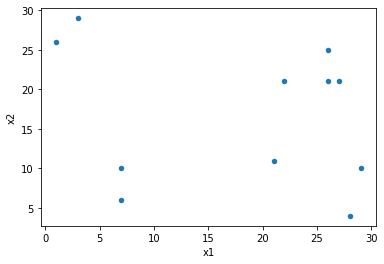

In [3]:
data = [[28,4],[7,10],[3,29],[26,21],[27,21],[7,6],[22,21],[29,10],[21,11],[1,26],[26,25]]
t = pd.DataFrame(data,columns=["x1","x2"])
t_data = np.array(t)
t.plot.scatter(x="x1",y="x2")

In [6]:
kmeans = KMeans(n_clusters=2, random_state=0,n_init=1,init=np.array([[18.2,17],[17.66,16.5]]),verbose=100).fit(t)

Initialization complete
Iteration 0, inertia 1914.5136000000005
Iteration 1, inertia 1143.7422222222224
Iteration 2, inertia 834.3214285714286
Converged at iteration 2: strict convergence.


In [7]:
kmeans.labels_ + 1

array([1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1], dtype=int32)

<AxesSubplot:xlabel='x1', ylabel='x2'>

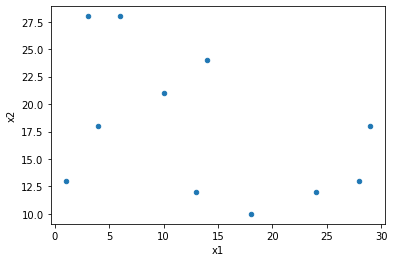

In [8]:
data = [[14,24], [18,10],[24,12],[1,13],[4,18],[28,13],[10,21],[3,28],[6,28],[13,12],[29,18]]
t = pd.DataFrame(data,columns=["x1","x2"])
t_data = np.array(t)
t.plot.scatter(x="x1",y="x2")

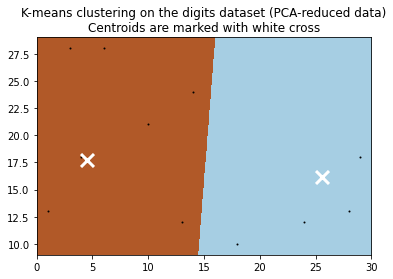

In [9]:
# taken from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py 
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = t_data[:, 0].min() - 1, t_data[:, 0].max() + 1
y_min, y_max = t_data[:, 1].min() - 1, t_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(t_data[:, 0], t_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [12]:
kmeans = KMeans(n_clusters=2, random_state=0,n_init=1,
                init=np.array([[12.2,15.4],[14.83333333,20]]),verbose=100).fit(t)

Initialization complete
Iteration 0, inertia 1242.3944445122224
Iteration 1, inertia 1165.892857142857
Converged at iteration 1: strict convergence.


In [13]:
kmeans.labels_ + 1

array([2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2], dtype=int32)

In [14]:
kmeans.cluster_centers_

array([[ 9.        , 13.25      ],
       [16.28571429, 20.57142857]])

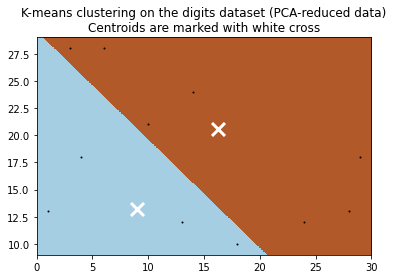

In [15]:
# taken from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py 
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = t_data[:, 0].min() - 1, t_data[:, 0].max() + 1
y_min, y_max = t_data[:, 1].min() - 1, t_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(t_data[:, 0], t_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

# Punto 5

<AxesSubplot:xlabel='x1', ylabel='x2'>

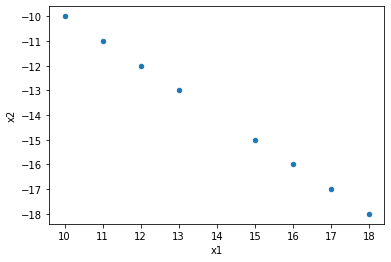

In [16]:
data = [[13,-13],
[18,-18],
[16,-16],
[17,-17],
[12,-12],
[10,-10],
[11,-11],
[15,-15]]
t = pd.DataFrame(data,columns=["x1","x2"])
t.plot.scatter(x="x1",y="x2")

In [17]:
t

,x1,x2
0,13,-13
1,18,-18
2,16,-16
3,17,-17
4,12,-12
5,10,-10
6,11,-11
7,15,-15


In [18]:
pca = PCA(n_components=1)
pca.fit(data)
pca.components_

array([[ 0.70710678, -0.70710678]])

In [19]:
pca.explained_variance_

array([17.14285714])

In [20]:
pca.transform(data)[:,0]

array([-1.41421356,  5.65685425,  2.82842712,  4.24264069, -2.82842712,
       -5.65685425, -4.24264069,  1.41421356])

In [21]:
pca.inverse_transform(pca.transform(data))

array([[ 13., -13.],
       [ 18., -18.],
       [ 16., -16.],
       [ 17., -17.],
       [ 12., -12.],
       [ 10., -10.],
       [ 11., -11.],
       [ 15., -15.]])

# Punto 6

In [22]:
data = [[3,9],[3,10],[9,81],[2,4],[9,82],[9,81],[6,37],[5,26],[5,26],[3,9],[8,65],[4,17],[2,4],[0,0]]
t = pd.DataFrame(data,columns=["x","y"])
t_train, t_test = t.iloc[7:,],t.iloc[0:7,]

#define response variable
y = t_train['y']

#define predictor variables
x = t_train[['x']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     41.97
Date:                Sat, 15 Apr 2023   Prob (F-statistic):            0.00131
Time:                        02:31:28   Log-Likelihood:                -23.156
No. Observations:                   7   AIC:                             50.31
Df Residuals:                       5   BIC:                             50.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.3676      5.674     -1.827      0.1

/Users/joseramirez/repository/dathic-growth_backend/venv/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [23]:
n = t_train.shape[0]
RSS = mean_squared_error(t_train["y"], model.predict(x)) * n
print(f"RSS Train {RSS} MSE train {RSS/n}")

RSS Train 306.17647058823536 MSE train 43.73949579831934


In [24]:
MSE_test = mean_squared_error(t_test['y'], model.predict(sm.add_constant(t_test[['x']])))
print(f"MSE Test {MSE_test}")

MSE Test 153.66714038556606


In [25]:
TSS = sum(map(lambda x: x*x, t_train['y'] - t_train['y'].mean()))
R_sq = 1 - RSS/TSS
print(f"TSS: {TSS}, R_sq = {R_sq}")

TSS: 2876.0, R_sq = 0.8935408655812812


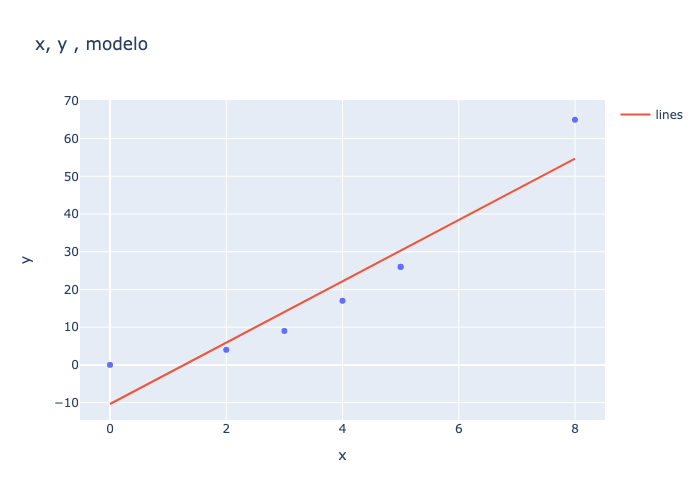

In [26]:
fig = px.scatter(t_train, x="x", y="y", 
                 title="x, y , modelo")
r_x = np.array(range(t_train["x"].min(),t_train["x"].max()+1))
r_y_hat = model.predict(sm.add_constant(r_x))
fig.add_trace(go.Scatter(x=r_x, y=r_y_hat,
                    mode='lines',
                    name='lines'))
display_static(fig)

In [27]:
x_2 = t_train[["x"]]*t_train[["x"]]

#define response variable
y = t_train['y']

#define predictor variables
x = x_2

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.643e+04
Date:                Sat, 15 Apr 2023   Prob (F-statistic):           5.48e-10
Time:                        02:31:32   Log-Likelihood:                -2.6542
No. Observations:                   7   AIC:                             9.308
Df Residuals:                       5   BIC:                             9.200
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2163      0.226      0.955      0.3

/Users/joseramirez/repository/dathic-growth_backend/venv/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 7 samples were given.



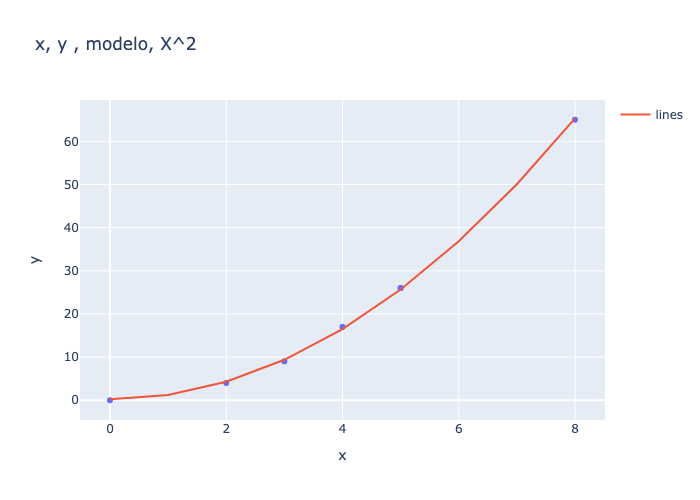

In [28]:
fig = px.scatter(t_train, x="x", y="y", 
                 title="x, y , modelo, X^2")
r_x = np.array(range(t_train["x"].min(),t_train["x"].max()+1))
r_y_hat = model.predict(sm.add_constant(r_x*r_x))
fig.add_trace(go.Scatter(x=r_x, y=r_y_hat,
                    mode='lines',
                    name='lines'))
display_static(fig)

# punto 7

In [29]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(t_train[['x']], t_train['y'])
y_hat = neigh.predict(t_test[['x']])
MSE_test = mean_squared_error(t_test['y'],y_hat)
print(f"MSE Test {MSE_test}")

MSE Test 1338.2857142857142


/Users/joseramirez/repository/dathic-growth_backend/venv/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [30]:
# resultado puede ser diferente
table = t_test.copy()
table["y_hat"] = y_hat
table

,x,y,y_hat
0,3,9,4
1,3,10,4
2,9,81,26
3,2,4,4
4,9,82,26
5,9,81,26
6,6,37,26
